In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import matplotlib
from matplotlib.colors import BoundaryNorm, ListedColormap

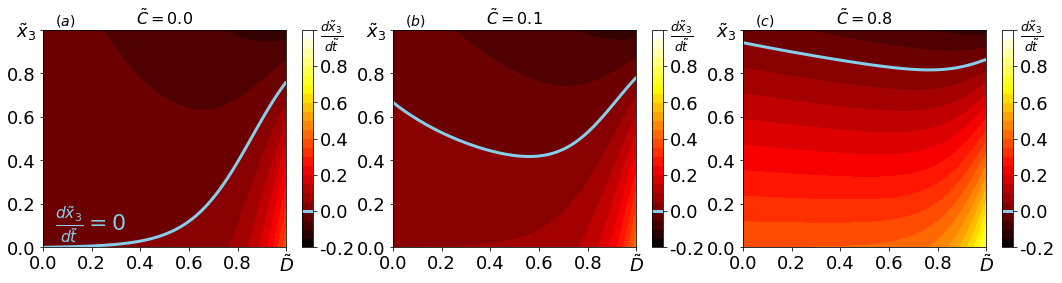

In [2]:
def y3(D,x3,a=3.41,v3=1/6,d3=0.1,ep=0.025,rho=0.5,C=0.2):
    
    return rho*C*(1-x3) + v3*(1-x3)*( (np.exp(a*D)-1) / (np.exp(a)-1) ) - d3 * D * x3 - ep*x3

x3ss=np.linspace(0,1,1000)
Dss=np.linspace(0,1,1000)

Ds, x3s = np.meshgrid(Dss,x3ss)


fig, axs = plt.subplots(1,3,figsize=(18,4))

Cs = [0,0.1,0.8]

custom_cmap ='hot'
custom_norm = matplotlib.colors.Normalize(-0.2,1.0) 

for i in range(3):

    Z = y3(Ds,x3s,a=8.840775775775775,v3=0.4,d3=0.1,ep=0.025,rho=0.5,C=Cs[i])

    clev = np.round(np.arange(-0.15,Z.max()+0.05,0.05),3)

    im = axs[i].contourf(Ds,x3s,Z,clev,cmap=custom_cmap,norm=custom_norm)
    cbar = fig.colorbar(plt.cm.ScalarMappable(norm=custom_norm, cmap=plt.cm.get_cmap('hot', 24)), ax=axs[i])
    cbar.set_ticks([-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
    cbar.set_ticklabels(['-0.2','0.0','0.2','0.4','0.6','0.8',r'$\frac{d\tilde{x}_3}{d\tilde{t}}$'])
    cbar.ax.tick_params(labelsize=18) 
    cbar.ax.plot([0,1],[0,0],color='skyblue',linewidth=3)

    axs[i].contour(Ds,x3s,Z,[0],colors='skyblue',linewidths=3)
    
    axs[i].set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
    axs[i].set_xticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{D}$'])
    
    axs[i].set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
    axs[i].set_yticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{x}_3$'])
    
    axs[i].tick_params(axis='both',labelsize=18)

    axs[i].set_xlim(0,1)

    axs[i].set_title(r'$\tilde{C}=$%.1f'%Cs[i],fontsize=16)
    
axs[0].text(0.05,1.02,r'$(a)$',fontsize=14)
axs[1].text(0.05,1.02,r'$(b)$',fontsize=14)
axs[2].text(0.05,1.02,r'$(c)$',fontsize=14)
    
axs[0].text(0.05,0.075,r'$\frac{d\tilde{x}_3}{d\tilde{t}}=0$',color='skyblue',fontsize=22)
    
fig.subplots_adjust(wspace=0.15)